In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd, numpy as np
from multiprocessing import cpu_count
from joblib import dump, load

In [2]:
X_train = pd.read_csv("./data/x_train.csv")
y_train = pd.read_csv("./data/y_train.csv").squeeze()

In [3]:
model = LinearRegression(n_jobs=cpu_count())
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,16
,positive,False


In [4]:
model.fit(X_train, y_train)
print("intercept:", model.intercept_)
pd.DataFrame(list(zip(model.feature_names_in_, model.coef_)), columns=["param", "coef"])

intercept: 86.72195526378724


,param,coef
0,building_size_m2,2.506307
1,occupants,12.513821
2,customer_type_residential,-0.652121
3,regions_North,1.156225
4,regions_Northeast,1.459084
5,regions_South,-0.754459
6,regions_Southeast,1.751846


In [5]:
dump(model, "./model/model.sklearn.joblib")

['./model/model.sklearn.joblib']

In [6]:
model = load("./model/model.sklearn.joblib")
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,16
,positive,False


In [7]:
X_test = pd.read_csv("./data/x_test.csv")
y_test = pd.read_csv("./data/y_test.csv").squeeze()

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error (MSE): 410.1589
Root Mean Squared Error (RMSE): 20.2524
Mean Absolute Error (MAE): 16.3538
R2 Score: 0.3138


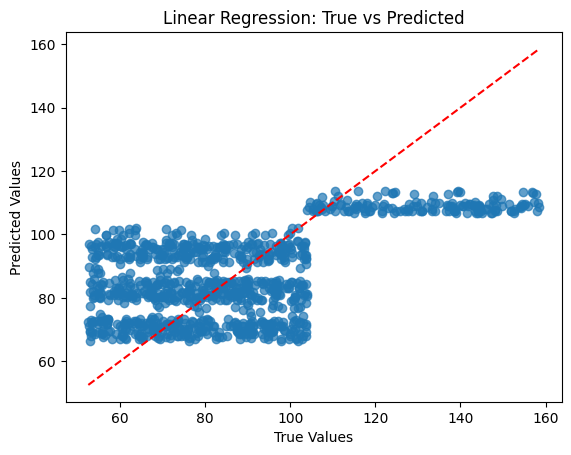

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: True vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()